# Variance & Standard Deviation
Variance measures how far a set of numbers are spread out from their average value. It quantifies the degree of variation or dispersion in a dataset. Standard deviation is the square root of variance, providing a measure of spread in the same units as the original data.

- **Measures spread:** Higher variance = more spread out data
- **Squared units:** Variance is in squared units of the original data
- **Sensitive to outliers:** Extreme values significantly increase variance
- **Population vs Sample:** Different formulas for population vs sample data
- **Foundation for other metrics:** Standard deviation is derived from variance

Formulas:
1. Population Variance (**σ²**) used when you have data for the entire population:
 $$σ² = \frac{Σ (x_i - μ)²}{N}$$  
 where **μ** is the population mean and **N** is the population size.

2. Sample Variance (**s²**) used when you have a sample from a population (uses Bessel's correction - n-1):
 $$s² = \frac{Σ (xᵢ - x̄)²}{(n - 1)}$$
 where **x̄** is the sample mean and **n** is the sample size.

**Why n-1?** This correction (degrees of freedom) makes the sample variance an unbiased estimator of the population variance.


##### Why Use Variance?
Advantages:
- **Uses all data points:** Considers every value in the dataset
- **Mathematically convenient:** Nice mathematical properties for calculations
- **Foundation for other concepts:** Basis for standard deviation, ANOVA, regression
- **Measures variability precisely:** More informative than range

Limitations:
- **Squared units:** Hard to interpret in original data units
- **Sensitive to outliers:** Extreme values disproportionately affect variance
- **Not intuitive:** Standard deviation is more commonly used for interpretation

## Implementation

### 1. Basic Variance Calculation

In [1]:
import numpy as np

# Sample dataset
data = [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]

# Manual calculation
def calculate_variance_manual(data, is_sample=True):
    mean = sum(data) / len(data)
    squared_differences = [(x - mean) ** 2 for x in data]
    sum_squared_diff = sum(squared_differences)
    
    if is_sample and len(data) > 1:
        variance = sum_squared_diff / (len(data) - 1)  # Sample variance
    else:
        variance = sum_squared_diff / len(data)  # Population variance
    
    return variance, mean, squared_differences

variance_manual, mean, squared_diffs = calculate_variance_manual(data, is_sample=True)

print(f"Dataset: {data}")
print(f"Mean: {mean:.2f}")
print(f"Squared differences from mean: {[f'{x:.2f}' for x in squared_diffs]}")
print(f"Sum of squared differences: {sum(squared_diffs):.2f}")
print(f"Sample Variance (manual): {variance_manual:.2f}")

Dataset: [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
Mean: 53.70
Squared differences from mean: ['942.49', '75.69', '176.89', '388.09', '1246.09', '5.29', '136.89', '1738.89', '590.49', '1391.29']
Sum of squared differences: 6692.10
Sample Variance (manual): 743.57


### 2. Using NumPy

In [2]:
import numpy as np

data = [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]

# Sample variance (default)
sample_variance = np.var(data, ddof=1)  # ddof=1 for sample variance
# Population variance
population_variance = np.var(data, ddof=0)  # ddof=0 for population variance

print(f"Dataset: {data}")
print(f"Sample Variance (n-1): {sample_variance:.2f}")
print(f"Population Variance (n): {population_variance:.2f}")

# Using separate functions
print(f"np.var(data, ddof=1): {np.var(data, ddof=1):.2f}")
print(f"np.var(data, ddof=0): {np.var(data, ddof=0):.2f}")

Dataset: [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
Sample Variance (n-1): 743.57
Population Variance (n): 669.21
np.var(data, ddof=1): 743.57
np.var(data, ddof=0): 669.21


### 3. Using pandas (for DataFrames)

In [6]:
import pandas as pd
import numpy as np

# Create a DataFrame with different datasets
data = {
    'low_variance': [48, 50, 52, 51, 49, 50, 51, 52, 49, 50],
    'high_variance': [10, 90, 5, 95, 15, 85, 20, 80, 25, 75],
    'normal_variance': [23, 45, 67, 34, 89, 56, 42, 12, 78, 91]
}

df = pd.DataFrame(data)

print("DataFrame:")
print(df.head())

# Variance for each column
print("\nVariance Analysis:")
for column in df.columns:
    sample_var = df[column].var()  # pandas default is sample variance (ddof=1)
    population_var = df[column].var(ddof=0)  # population variance
    mean_val = df[column].mean()
    std_dev = df[column].std() # Standard deviation is sqrt of variance
    
    print(f"\n{column}:")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Sample Variance: {sample_var:.2f}")
    print(f"  Population Variance: {population_var:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")

# Using describe() for comprehensive statistics
print("\nComprehensive Statistics:")
print(df.describe())

DataFrame:
   low_variance  high_variance  normal_variance
0            48             10               23
1            50             90               45
2            52              5               67
3            51             95               34
4            49             15               89

Variance Analysis:

low_variance:
  Mean: 50.20
  Sample Variance: 1.73
  Population Variance: 1.56
  Standard Deviation: 1.32

high_variance:
  Mean: 50.00
  Sample Variance: 1416.67
  Population Variance: 1275.00
  Standard Deviation: 37.64

normal_variance:
  Mean: 53.70
  Sample Variance: 743.57
  Population Variance: 669.21
  Standard Deviation: 27.27

Comprehensive Statistics:
       low_variance  high_variance  normal_variance
count     10.000000      10.000000        10.000000
mean      50.200000      50.000000        53.700000
std        1.316561      37.638633        27.268419
min       48.000000       5.000000        12.000000
25%       49.250000      16.250000        36.000000
50

## Real-World Examples

### 1. Investment Risk Analysis
In this example, we analyze the daily returns of some different stocks to understand their risk profiles. Variance helps us quantify how much the returns deviate from the average return, indicating the volatility of each stock.


Investment Return Analysis (Monthly % Returns):
       Tech_Stocks      Bonds  Real_Estate  Cryptocurrency
count    12.000000  12.000000         12.0       12.000000
mean      4.833333   2.083333          4.5        7.083333
std      12.960312   0.792961          1.0       43.299083
min     -12.000000   1.000000          3.0      -45.000000
25%      -5.750000   1.750000          4.0      -31.250000
50%       3.000000   2.000000          4.5        2.500000
75%      15.750000   3.000000          5.0       42.500000
max      25.000000   3.000000          6.0       70.000000

📊 Investment Risk Analysis (Higher Variance = Higher Risk):
       Investment  Mean_Return     Variance    Std_Dev Risk_Level Return_Range
3  Cryptocurrency     7.083333  1874.810606  43.299083       High    -45 to 70
0     Tech_Stocks     4.833333   167.969697  12.960312     Medium    -12 to 25
2     Real_Estate     4.500000     1.000000   1.000000        Low       3 to 6
1           Bonds     2.083333     0.628788 

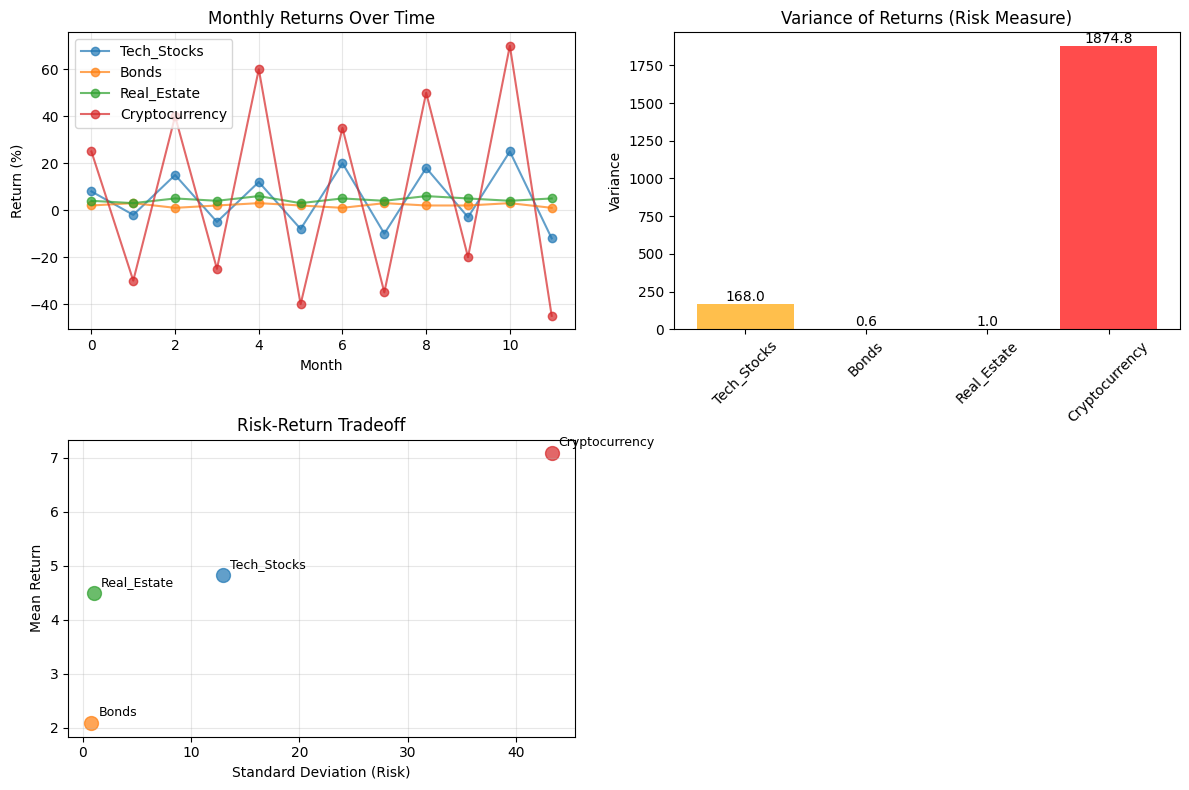

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_investment_risk():
    # Monthly returns for different investment types (%)
    investments = {
        'Tech_Stocks': [8, -2, 15, -5, 12, -8, 20, -10, 18, -3, 25, -12],
        'Bonds': [2, 3, 1, 2, 3, 2, 1, 3, 2, 2, 3, 1],
        'Real_Estate': [4, 3, 5, 4, 6, 3, 5, 4, 6, 5, 4, 5],
        'Cryptocurrency': [25, -30, 40, -25, 60, -40, 35, -35, 50, -20, 70, -45]
    }
    
    df_returns = pd.DataFrame(investments)
    
    print("Investment Return Analysis (Monthly % Returns):")
    print(df_returns.describe())
    
    # Risk analysis using variance
    risk_analysis = []
    
    for investment in df_returns.columns:
        returns = df_returns[investment]
        variance = returns.var()
        std_dev = returns.std()
        mean_return = returns.mean()
        min_return = returns.min()
        max_return = returns.max()
        
        risk_analysis.append({
            'Investment': investment,
            'Mean_Return': mean_return,
            'Variance': variance,
            'Std_Dev': std_dev,
            'Risk_Level': 'High' if variance > 200 else 'Medium' if variance > 50 else 'Low',
            'Return_Range': f"{min_return} to {max_return}"
        })
    
    risk_df = pd.DataFrame(risk_analysis)
    risk_df = risk_df.sort_values('Variance', ascending=False)
    
    print("\n📊 Investment Risk Analysis (Higher Variance = Higher Risk):")
    print(risk_df)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Returns over time
    plt.subplot(2, 2, 1)
    for investment in df_returns.columns:
        plt.plot(df_returns[investment], marker='o', label=investment, alpha=0.7)
    plt.title('Monthly Returns Over Time')
    plt.xlabel('Month')
    plt.ylabel('Return (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Variance comparison
    plt.subplot(2, 2, 2)
    variances = [ra['Variance'] for ra in risk_analysis]
    investments = [ra['Investment'] for ra in risk_analysis]
    colors = ['red' if v > 200 else 'orange' if v > 50 else 'green' for v in variances]
    
    bars = plt.bar(investments, variances, color=colors, alpha=0.7)
    plt.title('Variance of Returns (Risk Measure)')
    plt.ylabel('Variance')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom')
    
    # Plot 3: Risk-Return scatter
    plt.subplot(2, 2, 3)
    means = [ra['Mean_Return'] for ra in risk_analysis]
    std_devs = [ra['Std_Dev'] for ra in risk_analysis]
    
    for i, investment in enumerate(investments):
        plt.scatter(std_devs[i], means[i], s=100, alpha=0.7, label=investment)
        plt.annotate(investment, (std_devs[i], means[i]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=9)
    
    plt.xlabel('Standard Deviation (Risk)')
    plt.ylabel('Mean Return')
    plt.title('Risk-Return Tradeoff')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return df_returns, risk_df

df_returns, risk_analysis = analyze_investment_risk()

### 2. Manufacturing Quality Control
In this scenario, we examine the variance in the dimensions of manufactured parts. A low variance indicates that the parts are consistently produced within specified tolerances, while a high variance may signal issues in the manufacturing process that need to be addressed.

Manufacturing Quality Control Analysis:
Target Value: 100
Acceptable Tolerance: ±2.0

Quality Control Report:
  Production_Line    Mean   Variance   Std_Dev Within_Tolerance Quality_Grade
3          Line_D  100.00   0.000000  0.000000           100.0%             A
0          Line_A  100.01   0.023222  0.152388           100.0%             A
1          Line_B   99.95   3.691667  1.921371            80.0%             C
2          Line_C  100.00  42.222222  6.497863             0.0%             D


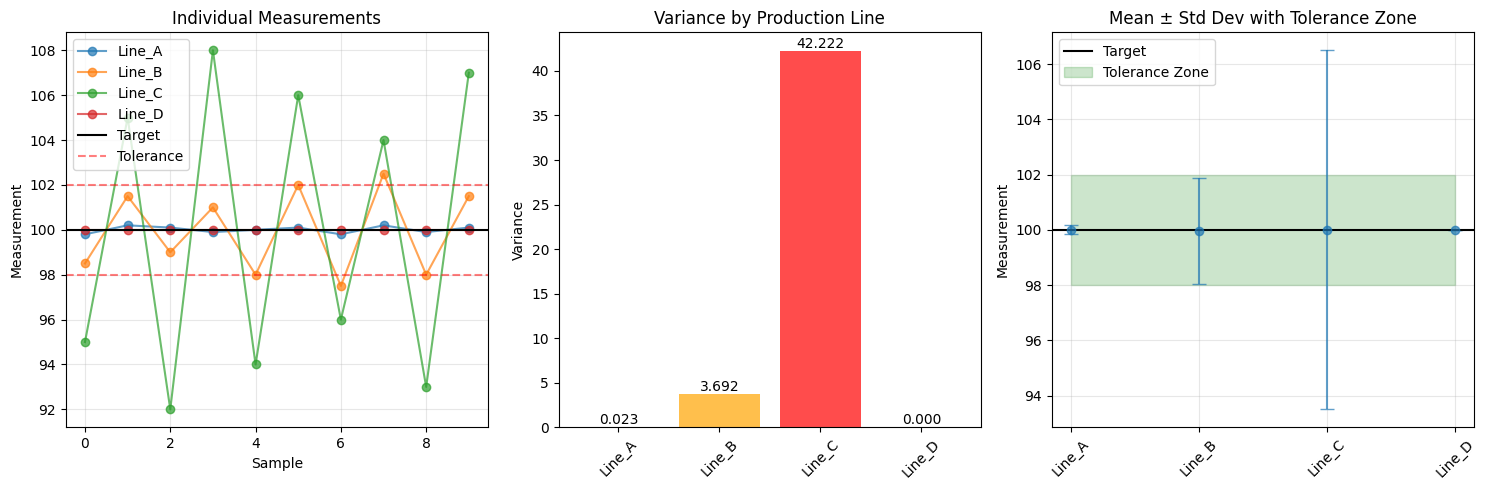

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def quality_control_analysis():
    # Product measurements from different production lines (target value = 100)
    production_data = {
        'Line_A': [99.8, 100.2, 100.1, 99.9, 100.0, 100.1, 99.8, 100.2, 99.9, 100.1],
        'Line_B': [98.5, 101.5, 99.0, 101.0, 98.0, 102.0, 97.5, 102.5, 98.0, 101.5],
        'Line_C': [95.0, 105.0, 92.0, 108.0, 94.0, 106.0, 96.0, 104.0, 93.0, 107.0],
        'Line_D': [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]  # Perfect
    }
    
    df_quality = pd.DataFrame(production_data)
    target_value = 100
    tolerance = 2.0  # Acceptable deviation
    
    print("Manufacturing Quality Control Analysis:")
    print(f"Target Value: {target_value}")
    print(f"Acceptable Tolerance: ±{tolerance}")
    
    quality_report = []
    
    for line in df_quality.columns:
        measurements = df_quality[line]
        variance = np.var(measurements, ddof=1)  # Sample variance
        std_dev = np.std(measurements, ddof=1)
        mean_val = np.mean(measurements)
        
        # Calculate percentage within tolerance
        within_tolerance = np.sum(np.abs(measurements - target_value) <= tolerance)
        percent_within_tolerance = (within_tolerance / len(measurements)) * 100
        
        quality_report.append({
            'Production_Line': line,
            'Mean': mean_val,
            'Variance': variance,
            'Std_Dev': std_dev,
            'Within_Tolerance': f"{percent_within_tolerance:.1f}%",
            'Quality_Grade': 'A' if variance < 0.1 else 'B' if variance < 1.0 else 'C' if variance < 10 else 'D'
        })
    
    quality_df = pd.DataFrame(quality_report)
    quality_df = quality_df.sort_values('Variance')
    
    print("\nQuality Control Report:")
    print(quality_df)
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Individual measurements
    plt.subplot(1, 3, 1)
    for line in df_quality.columns:
        plt.plot(df_quality[line], marker='o', label=line, alpha=0.7)
    plt.axhline(y=target_value, color='black', linestyle='-', label='Target')
    plt.axhline(y=target_value + tolerance, color='red', linestyle='--', alpha=0.5, label='Tolerance')
    plt.axhline(y=target_value - tolerance, color='red', linestyle='--', alpha=0.5)
    plt.title('Individual Measurements')
    plt.xlabel('Sample')
    plt.ylabel('Measurement')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Variance comparison
    plt.subplot(1, 3, 2)
    variances = [qr['Variance'] for qr in quality_report]
    lines = [qr['Production_Line'] for qr in quality_report]
    colors = ['green' if v < 0.1 else 'lightgreen' if v < 1.0 else 'orange' if v < 10 else 'red' for v in variances]
    
    bars = plt.bar(lines, variances, color=colors, alpha=0.7)
    plt.title('Variance by Production Line')
    plt.ylabel('Variance')
    plt.xticks(rotation=45)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')
    
    # Plot 3: Control chart style
    plt.subplot(1, 3, 3)
    means = [qr['Mean'] for qr in quality_report]
    std_devs = [qr['Std_Dev'] for qr in quality_report]
    
    plt.errorbar(lines, means, yerr=std_devs, fmt='o', capsize=5, alpha=0.7)
    plt.axhline(y=target_value, color='black', linestyle='-', label='Target')
    plt.fill_between(lines, target_value - tolerance, target_value + tolerance, 
                    alpha=0.2, color='green', label='Tolerance Zone')
    plt.title('Mean ± Std Dev with Tolerance Zone')
    plt.ylabel('Measurement')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return df_quality, quality_df

df_quality, quality_report = quality_control_analysis()

## Advanced Usage


### 1. Variance in Multiple Dimensions

In [11]:
import numpy as np
import pandas as pd

def multivariate_variance():
    # Dataset with multiple features
    data = {
        'age': [25, 30, 35, 40, 45, 50, 55, 60],
        'income': [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000],
        'spending': [20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000]
    }
    
    df = pd.DataFrame(data)
    
    print("Multivariate Variance Analysis:")
    print(df)
    
    # Covariance matrix - shows variance on diagonal
    covariance_matrix = df.cov()
    print("\nCovariance Matrix (diagonal = variances):")
    print(covariance_matrix)
    
    # Variance along different axes
    print("\nVariance Summary:")
    for column in df.columns:
        variance = df[column].var()
        std_dev = df[column].std()
        print(f"{column}: Variance = {variance:,.2f}, Std Dev = {std_dev:,.2f}")
    
    # Coefficient of Variation (CV) = std/mean
    print("\nCoefficient of Variation (CV = Std Dev / Mean):")
    for column in df.columns:
        cv = df[column].std() / df[column].mean()
        print(f"{column}: CV = {cv:.3f} ({cv*100:.1f}%)")
    
    return df, covariance_matrix

df_multi, cov_matrix = multivariate_variance()

Multivariate Variance Analysis:
   age  income  spending
0   25   50000     20000
1   30   55000     22000
2   35   60000     24000
3   40   65000     26000
4   45   70000     28000
5   50   75000     30000
6   55   80000     32000
7   60   85000     34000

Covariance Matrix (diagonal = variances):
               age       income    spending
age          150.0     150000.0     60000.0
income    150000.0  150000000.0  60000000.0
spending   60000.0   60000000.0  24000000.0

Variance Summary:
age: Variance = 150.00, Std Dev = 12.25
income: Variance = 150,000,000.00, Std Dev = 12,247.45
spending: Variance = 24,000,000.00, Std Dev = 4,898.98

Coefficient of Variation (CV = Std Dev / Mean):
age: CV = 0.288 (28.8%)
income: CV = 0.181 (18.1%)
spending: CV = 0.181 (18.1%)


### 2. Rolling Variance for Time Series

Time Series with Rolling Variance:
             returns  rolling_variance  rolling_std
date                                               
2024-03-31  0.194155          4.513512     2.124503
2024-04-01  1.937290          4.212889     2.052532
2024-04-02 -1.404106          4.307550     2.075464
2024-04-03 -0.655324          3.738712     1.933575
2024-04-04 -0.784216          2.407888     1.551737
2024-04-05 -2.927030          2.631422     1.622166
2024-04-06  0.592241          2.660648     1.631149
2024-04-07  0.522111          2.684752     1.638521
2024-04-08  0.010227          2.678995     1.636764
2024-04-09 -0.469174          1.908878     1.381621


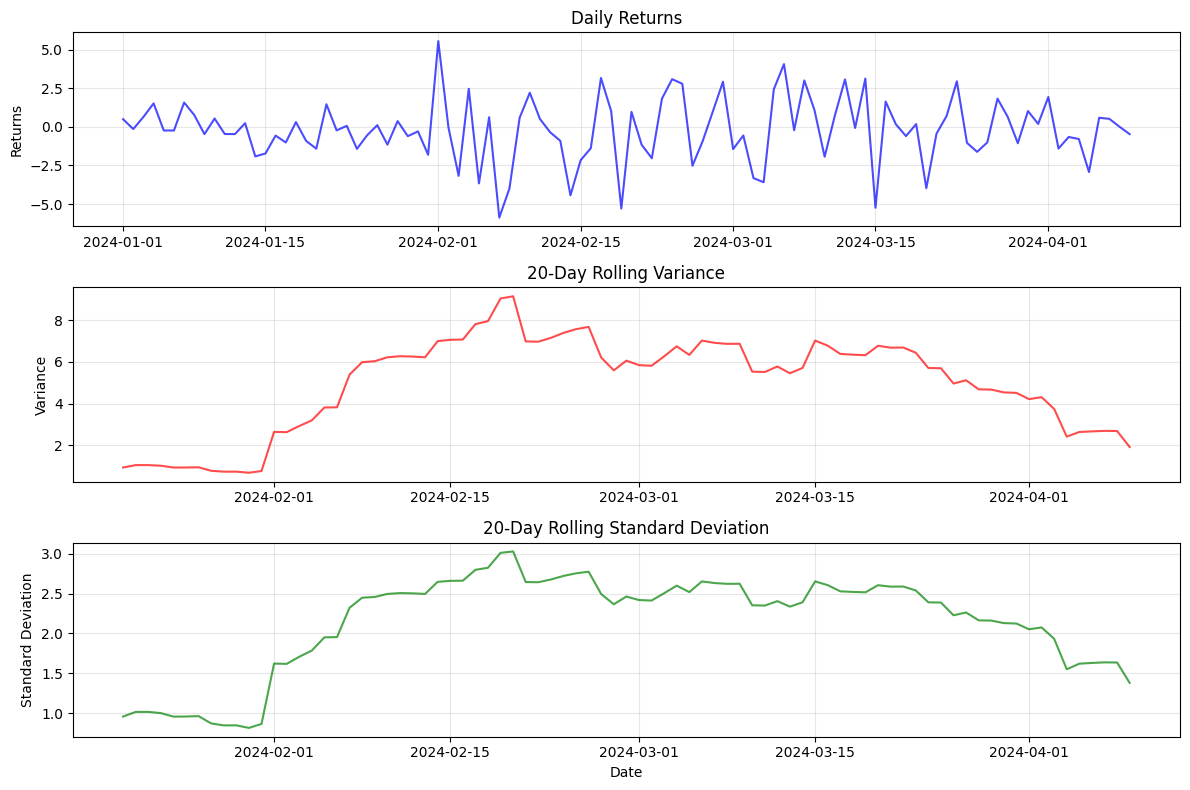


High Volatility Periods (Variance > 4):
Start: 2024-02-07
End: 2024-04-02
Duration: 56 days


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rolling_variance_analysis():
    # Create time series data with changing volatility
    np.random.seed(42)
    dates = pd.date_range('2024-01-01', periods=100, freq='D')
    
    # Generate data with different variance regimes
    low_vol = np.random.normal(0, 1, 30)
    high_vol = np.random.normal(0, 3, 40)
    medium_vol = np.random.normal(0, 2, 30)
    
    returns = np.concatenate([low_vol, high_vol, medium_vol])
    
    # Create DataFrame
    ts_data = pd.DataFrame({
        'date': dates,
        'returns': returns
    })
    ts_data = ts_data.set_index('date')
    
    # Calculate rolling variance (20-day window)
    ts_data['rolling_variance'] = ts_data['returns'].rolling(window=20).var()
    ts_data['rolling_std'] = ts_data['returns'].rolling(window=20).std()
    
    print("Time Series with Rolling Variance:")
    print(ts_data.tail(10))
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Original returns
    plt.subplot(3, 1, 1)
    plt.plot(ts_data.index, ts_data['returns'], color='blue', alpha=0.7)
    plt.title('Daily Returns')
    plt.ylabel('Returns')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Rolling variance
    plt.subplot(3, 1, 2)
    plt.plot(ts_data.index, ts_data['rolling_variance'], color='red', alpha=0.7)
    plt.title('20-Day Rolling Variance')
    plt.ylabel('Variance')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: Rolling standard deviation
    plt.subplot(3, 1, 3)
    plt.plot(ts_data.index, ts_data['rolling_std'], color='green', alpha=0.7)
    plt.title('20-Day Rolling Standard Deviation')
    plt.ylabel('Standard Deviation')
    plt.xlabel('Date')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Identify high volatility periods
    high_vol_periods = ts_data[ts_data['rolling_variance'] > 4]
    if not high_vol_periods.empty:
        print(f"\nHigh Volatility Periods (Variance > 4):")
        print(f"Start: {high_vol_periods.index[0].strftime('%Y-%m-%d')}")
        print(f"End: {high_vol_periods.index[-1].strftime('%Y-%m-%d')}")
        print(f"Duration: {len(high_vol_periods)} days")
    
    return ts_data

ts_data = rolling_variance_analysis()

**Key Python Functions Summary**

| Function                   | Library      | Usage                | Parameters                                      |
|----------------------------|--------------|----------------------|-------------------------------------------------|
| `np.var(data, ddof=1)`     | NumPy        | Sample variance      | `ddof=1` for sample, `ddof=0` for population    |
| `pd.Series.var()`          | pandas       | Sample variance      | Default is `ddof=1`                             |
| `pd.Series.var(ddof=0)`    | pandas       | Population variance  | Explicitly set `ddof=0`                         |
| `statistics.variance()`    | statistics   | Sample variance      | Built-in module for basic stats                 |
| `statistics.pvariance()`   | statistics   | Population variance  | Built-in module                                 |

Practical Insights
- Low variance → Data points are close to the mean (consistent)
- High variance → Data points are spread out (variable)
- Always specify whether you're calculating population or sample variance
- Variance + Standard Deviation together give complete picture of spread
- **In machine learning:** Variance is crucial for feature selection, model evaluation, and understanding overfitting

Variance is fundamental to understanding data variability and is the building block for many advanced statistical concepts and machine learning algorithms!

